In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
table = pd.read_csv("laptop_price.csv",delimiter=',')
table



,Product,Weight,Price_euros
0,17-Y002nv (A10-9600P/6GB/2TB/Radeon,2.65,569.00
1,IdeaPad 310-15ABR,2.40,499.00
2,Aspire 5,2.20,579.00
3,17-ak002nv (A10-9620P/6GB/2TB/Radeon,2.71,655.01
4,X555QG-DM242T (A10-9620P/4GB/1TB,2.20,575.00
5,15-bw007nv (A10-9620P/6GB/128GB/Radeon,1.91,568.90
6,15-ba043na (A12-9700P/8GB/2TB/W10),2.04,629.00
7,15-bw009nv (A12-9720P/6GB/1TB/Radeon,2.10,529.00
8,IdeaPad 320-15ABR,2.20,899.00
9,IdeaPad 110-17ACL,2.80,379.00


Задание 1

In [202]:
x_mid = 1.839
y_mid = 387.198
x_sko = 0.62
y_sko = 204.565
print('данные из 4 работы:')
print('выборочное среднее для Weight(или x): ', x_mid)
print('выборочное среднее для Price_euros(или y): ', y_mid)
print('выборочное ско для Weight(или x): ', x_sko)
print('выборочное ско для Price_euros(или y): ', y_sko)
print('---------')
x_norm = (table['Weight'] - x_mid)/ x_sko
y_norm = (table['Price_euros'] - y_mid)/ y_sko
print ('нормализация: ')
table_norm = pd.DataFrame({'x': x_norm, 'y': y_norm})
table_norm



данные из 4 работы:
выборочное среднее для Weight(или x):  1.839
выборочное среднее для Price_euros(или y):  387.198
выборочное ско для Weight(или x):  0.62
выборочное ско для Price_euros(или y):  204.565
---------
нормализация: 


,x,y
0,1.308065,0.888725
1,0.904839,0.546535
2,0.582258,0.937609
3,1.404839,1.309178
4,0.582258,0.918055
5,0.114516,0.888236
6,0.324194,1.182030
7,0.420968,0.693188
8,0.582258,2.501904
9,1.550000,-0.040075


Задание 2

In [203]:
n = len(table['Weight'])
k_est = int(np.sqrt(n / 2)//1)
print(f'верхняя оценка количества кластеров: {k_est}')

верхняя оценка количества кластеров: 7


Задание 3

получившаяся таблица соответствия исходных точек центройдам:
            x         y  centroid
0    1.308065  0.888725         1
1    0.904839  0.546535         1
2    0.582258  0.937609         1
3    1.404839  1.309178         1
4    0.582258  0.918055         1
5    0.114516  0.888236         1
6    0.324194  1.182030         1
7    0.420968  0.693188         1
8    0.582258  2.501904         1
9    1.550000 -0.040075         3
10   0.566129 -0.436037         3
11   0.420968  0.052805         3
12   1.404839  0.253230         3
13   0.033871  0.055200         3
14   0.582258  0.057693         3
15   0.114516  0.448229         3
16   0.114516  0.286960         3
17   0.904839  0.302114         3
18   0.630645  0.399883         3
19   0.324194  0.795796         1
20   0.420968  0.062582         3
21  -0.256452  0.399883         3
22   0.308065  0.077247         3
23   0.114516  0.497602         3
24   0.114516  0.546535         3
25   0.420968  0.497651         3
26   1.227419  0.6535

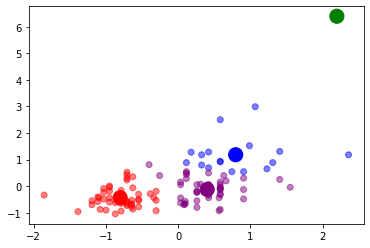

In [204]:




def recalc_centr(data, centroids):
    centroid_recalc = []
    centroid_err = []
    for i in range(data.shape[0]):
        errors = np.array([])
        for j in range(centroids.shape[0]):
            error = calc_error(centroids.iloc[j, :2], data.iloc[i,:2])
            errors = np.append(errors, error)
        closest_centr =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)
        centroid_recalc.append(closest_centr)
        centroid_err.append(centroid_error)
    return centroid_recalc, centroid_err


def calc_error(a,b):
    return np.square(np.sum((a - b)**2))

def init_centroids(k, data):
    n_dims = data.shape[1]
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    centroids = []
    for i in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)
    centroids = pd.DataFrame(centroids, columns = data.columns)
    return centroids

def k_means(data, k):
    centroids = init_centroids(k, data)
    error = []
    isContinue = True
    i = 0
    while isContinue:
        data['centroid'], iter_error = recalc_centr(data,centroids)
        error.append(sum(iter_error))
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
        error = [round(x, 3) for x in error]
        if len(error) >= 2:
            if error[i] ==  error[i - 1]:
               break
        i += 1

    data['centroid'], iter_error = recalc_centr(data,centroids)
    centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
    return data['centroid'], centroids

table_norm['centroid'], centroids =  k_means(table_norm, k_est)
pd.set_option('display.max_rows', None)
print('получившаяся таблица соответствия исходных точек центройдам:')
print(table_norm)
colors = {0:'red', 1:'blue', 2:'green', 3: 'purple', 4: 'black', 5: 'beige', 6: 'magenta'}
plt.scatter(table_norm.iloc[:,0], table_norm.iloc[:,1],  marker = 'o', c = table_norm['centroid'].apply(lambda x: colors[x]),  alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s = 200, c = centroids.index.map(lambda x: colors[x]) )